In [1]:
import os
import matplotlib.pyplot as plt
import seaborn 
import pandas as pd


In [2]:
with open('WhatsApp Chat with मेरे प्यारे  ब्रोsdike.txt' , encoding="utf-8") as f:
    file=f.readlines()

In [3]:
headers=['Date_Time','User','Message']

In [4]:
def parse_value(line):
    line_data=[]
    
    if line.strip()[:2].isnumeric():
            pos1=line.strip().index("-",0)
            date=line.strip()[0:pos1].strip()
            line_data.append(date)
            try:
                pos2=line.strip().index(":",pos1)
                user=line.strip()[pos1+1:pos2].strip()
                line_data.append(user)
            except ValueError:
                    line_data.append("Group notification")
                    pos2=pos1
    else:
        line_data.append("Nan")
        line_data.append("Nan")
        pos2=-1
           
    message=line.strip()[pos2+1:].strip()
    line_data.append(message)
    
    return line_data
        
        
        

In [5]:
def create_dict(line):
    line_data_dict={}
    for header,value in zip(headers,parse_value(line)):
        line_data_dict[header]=value
    return line_data_dict

In [6]:
def list_of_dictfile(file):
    result_file=[]
    for line in file:
        if not line[0]=="\n":
                dict_item=create_dict(line)
                result_file.append(dict_item)
    return result_file

In [7]:
result_file=list_of_dictfile(file)

In [8]:

file_df=pd.DataFrame(result_file)

In [9]:
file_df.head(10)

,Date_Time,User,Message
0,"28/08/20, 9:22 pm",Group notification,Messages and calls are end-to-end encrypted. N...
1,"21/04/20, 3:02 pm",Group notification,"+91 93157 41581 created group ""मेरे प्यारे ब्..."
2,"21/04/20, 3:02 pm",Group notification,You were added
3,"30/08/20, 5:50 am",Mohit Dudi,<Media omitted>
4,"30/08/20, 5:51 am",Mohit Dudi,Iska b kr lo kch
5,"30/08/20, 6:48 am",LK Meena,देखकर आश्चर्य हुआ कि इस दौड़ में पतंजली कैसे पी...
6,"30/08/20, 8:40 am",+91 6350 436 235,देखकर आश्चर्य हुआ कि इतनी बड़ी खबर को कोने में...
7,Nan,Nan,#modi_ne_media_ki_gaand_maar_rkhi_hai
8,"30/08/20, 8:42 am",Aynjaney,Yes bhai Ye baat v h
9,"30/08/20, 8:42 am",Mohit Dudi,👌


In [10]:
file_df.drop(index=file_df.Message[file_df.Message=="<Media omitted>"].index,inplace=True)


In [11]:
for index in file_df.Date_Time.index:
    if(file_df.Date_Time[index]=="Nan"):
        file_df.Date_Time[index]=file_df.Date_Time[index-1]
        file_df.User[index]=file_df.User[index-1]

In [12]:
file_df.head(20)

,Date_Time,User,Message
0,"28/08/20, 9:22 pm",Group notification,Messages and calls are end-to-end encrypted. N...
1,"21/04/20, 3:02 pm",Group notification,"+91 93157 41581 created group ""मेरे प्यारे ब्..."
2,"21/04/20, 3:02 pm",Group notification,You were added
4,"30/08/20, 5:51 am",Mohit Dudi,Iska b kr lo kch
5,"30/08/20, 6:48 am",LK Meena,देखकर आश्चर्य हुआ कि इस दौड़ में पतंजली कैसे पी...
6,"30/08/20, 8:40 am",+91 6350 436 235,देखकर आश्चर्य हुआ कि इतनी बड़ी खबर को कोने में...
7,"30/08/20, 8:40 am",+91 6350 436 235,#modi_ne_media_ki_gaand_maar_rkhi_hai
8,"30/08/20, 8:42 am",Aynjaney,Yes bhai Ye baat v h
9,"30/08/20, 8:42 am",Mohit Dudi,👌
10,"30/08/20, 8:42 am",Aynjaney,Or Train Ko jaldi jaldi privatised kre bekar k...


In [13]:
file_df.to_csv('Whatsapp_DataScience_Project.csv')

In [14]:
file_df['Date_Time']=pd.to_datetime(file_df.Date_Time)

In [15]:
file_df.Date_Time.dt.weekday

0       4
1       1
2       1
4       6
5       6
       ..
1850    1
1851    1
1852    1
1853    3
1854    1
Name: Date_Time, Length: 1678, dtype: int64

In [16]:
file_df['Month']=file_df['Date_Time'].apply(lambda x: x.month_name())
file_df['weekday']=file_df['Date_Time'].apply(lambda x: x.day_name())
file_df['Hour']=file_df.Date_Time.dt.hour

In [17]:
file_df

,Date_Time,User,Message,Month,weekday,Hour
0,2020-08-28 21:22:00,Group notification,Messages and calls are end-to-end encrypted. N...,August,Friday,21
1,2020-04-21 15:02:00,Group notification,"+91 93157 41581 created group ""मेरे प्यारे ब्...",April,Tuesday,15
2,2020-04-21 15:02:00,Group notification,You were added,April,Tuesday,15
4,2020-08-30 05:51:00,Mohit Dudi,Iska b kr lo kch,August,Sunday,5
5,2020-08-30 06:48:00,LK Meena,देखकर आश्चर्य हुआ कि इस दौड़ में पतंजली कैसे पी...,August,Sunday,6
...,...,...,...,...,...,...
1850,2021-09-07 13:34:00,Ashok Babu,HD content dekhta hai bhai AP singh,September,Tuesday,13
1851,2021-09-07 13:34:00,Mohit Dudi,😂😂😂,September,Tuesday,13
1852,2021-09-07 13:41:00,Puneet,Ohh bete 😂😂,September,Tuesday,13
1853,2021-10-07 22:59:00,Group notification,Your security code with Ashok Babu changed. Ta...,October,Thursday,22


<AxesSubplot:xlabel='User', ylabel='count'>

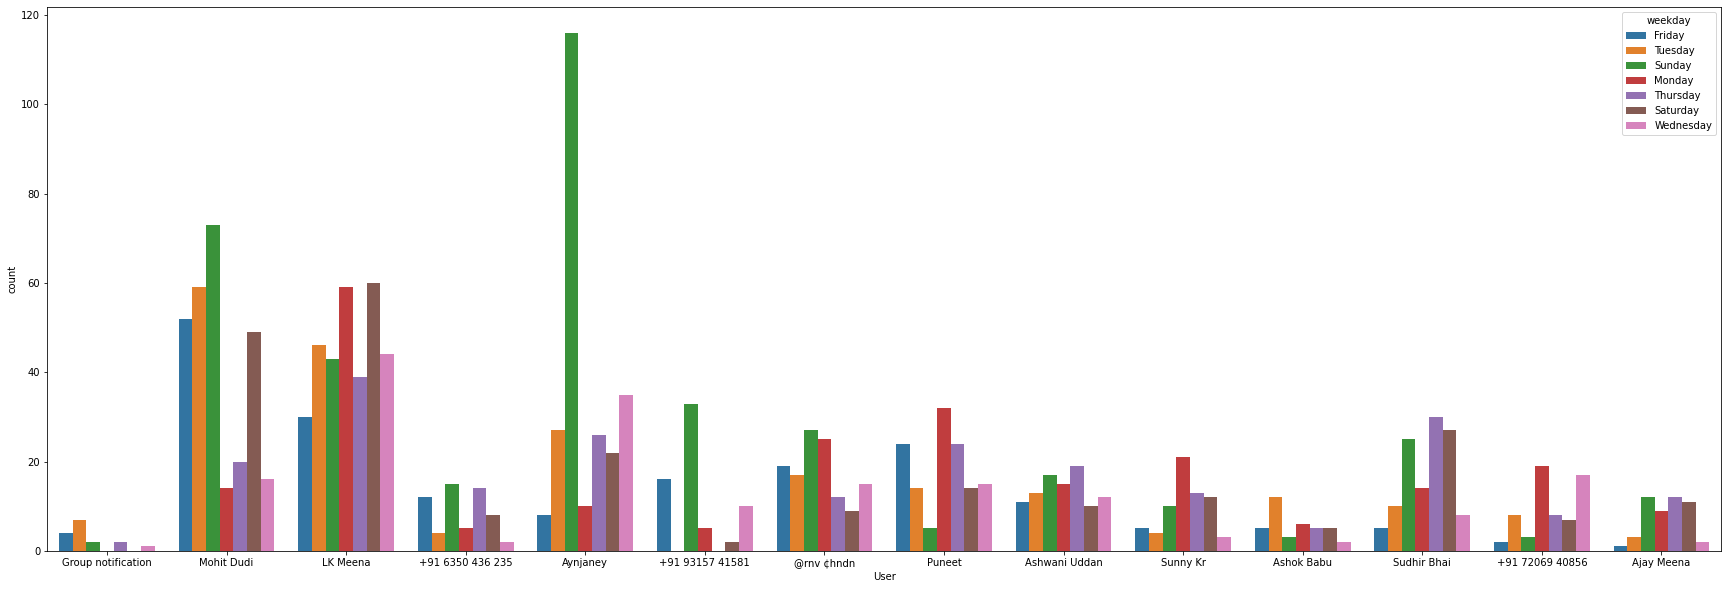

In [18]:
plt.figure(figsize=(30,10))
seaborn.countplot(x="User", hue="weekday", data=file_df)

<AxesSubplot:xlabel='User', ylabel='count'>

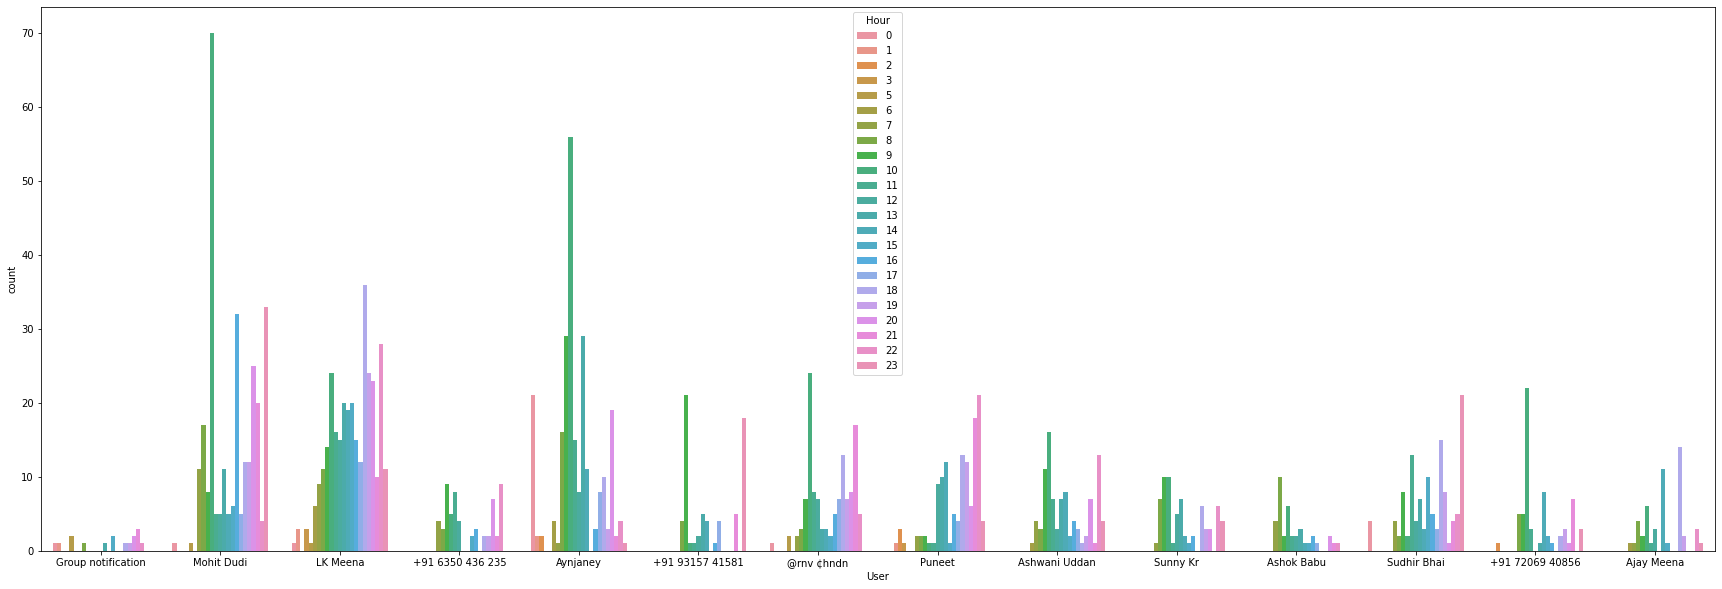

In [19]:
plt.figure(figsize=(30,10))
seaborn.countplot(x="User", hue="Hour", data=file_df)

### most active user

In [20]:
user_data = file_df.groupby("User")["Message"].count().sort_values(ascending=True)
user_name=user_data.index
message_per_user=user_data

In [21]:
message_per_user

User
Group notification     16
Ashok Babu             38
Ajay Meena             50
+91 6350 436 235       60
+91 72069 40856        64
+91 93157 41581        66
Sunny Kr               68
Ashwani Uddan          97
Sudhir Bhai           119
@rnv ¢hndn            124
Puneet                128
Aynjaney              244
Mohit Dudi            283
LK Meena              321
Name: Message, dtype: int64

In [22]:
import numpy
hour_df = pd.DataFrame(index=numpy.arange(0,24))

for name in user_name:
    hour_df[name]=file_df[(file_df.User==name)].groupby('Hour').size().sort_index()
    
weekday_df = pd.DataFrame(index=numpy.arange(0,7))
for name in user_name:
    weekday_df[name]=file_df[(file_df.User==name)].groupby('Day').size().sort_index()    

KeyError: 'Day'

In [ ]:
weekday_df

In [ ]:
file_df.groupby('Hour')[[]]

#Emoji

In [ ]:

plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(3, 2, figsize=(16, 30))
axes[0,0].hist(file_df['Month'],bins=12,edgecolor='yellow')
axes[0,0].set_title('Distrinution of Messages')
axes[0,0].set_xlabel('Months')
axes[0,0].set_ylabel('No. of Messages')

axes[0,1].hist(file_df['Day'],bins=7,edgecolor='yellow')
axes[0,1].set_title('Distrinution of Messages')
axes[0,1].set_xlabel('Day')
axes[0,1].set_ylabel('No. of Messages')

axes[1,0].barh(user_name,message_per_user,color='y')
axes[1,0].set_title("Most Active User")
axes[1,0].set_xlabel('message_per_User')
axes[1,0].set_ylabel('User')

axes[1,1].hist(chandan,bins=24,edgecolor='yellow')
axes[1,1].set_title("Distrinution of Messages")
axes[1,1].set_xlabel('hour')
axes[1,1].set_ylabel('No. of Messages')

plt.legend()